# PyCon 2018: Using pandas for Better (and Worse) Data Science

### GitHub repository: https://github.com/justmarkham/pycon-2018-tutorial

### Instructor: Kevin Markham

- GitHub: https://github.com/justmarkham
- Twitter: https://twitter.com/justmarkham
- YouTube: https://www.youtube.com/dataschool
- Website: http://www.dataschool.io

In [3]:
import pandas as pd
pd.__version__

'0.24.2'

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

# Dataset: Stanford Open Policing Project  ([video](https://www.youtube.com/watch?v=hl-TGI4550M&list=PL5-da3qGB5IBITZj_dYSFqnd_15JgqwA6&index=1))

https://openpolicing.stanford.edu/

In [5]:
# ri stands for Rhode Island
ri = pd.read_csv('data/police.csv')

In [6]:
# what does each row represent?
ri.head()

,stop_date,stop_time,county_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,2005-01-02,01:55,NaN,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,2005-01-18,08:15,NaN,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2,2005-01-23,23:15,NaN,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
3,2005-02-20,17:15,NaN,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False
4,2005-03-14,10:00,NaN,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


In [7]:
# what do these numbers mean?
ri.shape

(91741, 15)

In [8]:
# what do these types mean?
ri.dtypes

stop_date              object
stop_time              object
county_name           float64
driver_gender          object
driver_age_raw        float64
driver_age            float64
driver_race            object
violation_raw          object
violation              object
search_conducted         bool
search_type            object
stop_outcome           object
is_arrested            object
stop_duration          object
drugs_related_stop       bool
dtype: object

- What does NaN mean?
- Why might a value be missing?
- Why mark it as NaN? Why not mark it as a 0 or an empty string or a string saying "Unknown"?

In [9]:
# what are these counts? how does this work?
ri.isnull().sum()

stop_date                 0
stop_time                 0
county_name           91741
driver_gender          5335
driver_age_raw         5327
driver_age             5621
driver_race            5333
violation_raw          5333
violation              5333
search_conducted          0
search_type           88545
stop_outcome           5333
is_arrested            5333
stop_duration          5333
drugs_related_stop        0
dtype: int64

In [10]:
(True == 1) and (False == 0)

True

## 1. Remove the column that only contains missing values ([video](https://www.youtube.com/watch?v=TW5RqdDBasg&list=PL5-da3qGB5IBITZj_dYSFqnd_15JgqwA6&index=2))

In [11]:
# axis=1 also works, inplace is False by default, inplace=True avoids assignment statement
# inplacce คือไม่ต้องมาโยน = ใส่ลงไป ก็คือ แทน ri ไปเลย
ri.drop('county_name', axis='columns', inplace=True)

In [12]:
ri.shape

(91741, 14)

In [13]:
ri.columns

Index(['stop_date', 'stop_time', 'driver_gender', 'driver_age_raw',
       'driver_age', 'driver_race', 'violation_raw', 'violation',
       'search_conducted', 'search_type', 'stop_outcome', 'is_arrested',
       'stop_duration', 'drugs_related_stop'],
      dtype='object')

# alternative method

In [14]:
# how="all" means drop any columns all of which values are null (NA)
# ก็คือ column ไหนที่เป็น null ทั้งหมดก็จะลบ
# how="any" ก็คือทุก column ที่มี null

In [15]:
ri.dropna(axis='columns', how='all').shape

(91741, 14)

# another alternative
is using delete teacher don't suggest to use this method


del ri['county_name'],
ri.columns

In [16]:
ri.columns

Index(['stop_date', 'stop_time', 'driver_gender', 'driver_age_raw',
       'driver_age', 'driver_race', 'violation_raw', 'violation',
       'search_conducted', 'search_type', 'stop_outcome', 'is_arrested',
       'stop_duration', 'drugs_related_stop'],
      dtype='object')

Lessons:

- Pay attention to default arguments
- Check your work
- There is more than one way to do everything in pandas

## 2. Do men or women speed more often? ([video](https://www.youtube.com/watch?v=d0oBRIONOEw&list=PL5-da3qGB5IBITZj_dYSFqnd_15JgqwA6&index=3))

In [17]:
# when someone is stopped for speeding, how often is it a man or woman?
ri[ri.violation == 'Speeding'].driver_gender.value_counts(normalize=True)

# its a raw data cant really use for confirm cause in reallity man usually driving more than woman

M    0.680527
F    0.319473
Name: driver_gender, dtype: float64

In [18]:
# alternative
ri.loc[ri.violation == 'Speeding', 'driver_gender'].value_counts(normalize=True)

M    0.680527
F    0.319473
Name: driver_gender, dtype: float64

In [19]:
# when a man is pulled over, how often is it for speeding?
ri[ri.driver_gender == 'M'].violation.value_counts(normalize=True)

Speeding               0.524350
Moving violation       0.207012
Equipment              0.135671
Other                  0.057668
Registration/plates    0.038461
Seat belt              0.036839
Name: violation, dtype: float64

In [20]:
# repeat for women
ri[ri.driver_gender == 'F'].violation.value_counts(normalize=True)

Speeding               0.658500
Moving violation       0.136277
Equipment              0.105780
Registration/plates    0.043086
Other                  0.029348
Seat belt              0.027009
Name: violation, dtype: float64

In [21]:
# combines the two lines above
# groupby gender and then count violation and normalize it to see the ratio
ri.groupby('driver_gender').violation.value_counts(normalize=True).unstack()
# unstack make it easily to see

violation,Equipment,Moving violation,Other,Registration/plates,Seat belt,Speeding
driver_gender,,,,,,
F,0.105780,0.136277,0.029348,0.043086,0.027009,0.65850
M,0.135671,0.207012,0.057668,0.038461,0.036839,0.52435


What are some relevant facts that we don't know?

Lessons:

- There is more than one way to understand a question

## 3. Does gender affect who gets searched during a stop? ([video](https://www.youtube.com/watch?v=WzpGq1X5U1M&list=PL5-da3qGB5IBITZj_dYSFqnd_15JgqwA6&index=4))

In [22]:
# ignore gender for the moment
# search_conducted = true mean when the you pull over police will searched you too
ri.search_conducted.value_counts(normalize=True)

False    0.965163
True     0.034837
Name: search_conducted, dtype: float64

In [23]:
# how does this work?
ri.search_conducted.mean()

0.03483720473942948

In [24]:
# search rate by gender
ri.groupby('driver_gender').search_conducted.mean()

driver_gender
F    0.020033
M    0.043326
Name: search_conducted, dtype: float64

Does this prove that gender affects who gets searched?

In [25]:
# include a second factor
ri.groupby(["driver_gender", "violation"]).search_conducted.mean()

driver_gender  violation          
F              Equipment              0.042622
               Moving violation       0.036205
               Other                  0.056522
               Registration/plates    0.066140
               Seat belt              0.012598
               Speeding               0.008720
M              Equipment              0.070081
               Moving violation       0.059831
               Other                  0.047146
               Registration/plates    0.110376
               Seat belt              0.037980
               Speeding               0.024925
Name: search_conducted, dtype: float64

# is it racist ?

not quite sure eh?

In [26]:
ri.groupby("driver_race").search_conducted.mean()

driver_race
Asian       0.022576
Black       0.064521
Hispanic    0.061428
Other       0.012500
White       0.028444
Name: search_conducted, dtype: float64

Does this prove causation?

Lessons:

- Causation is difficult to conclude, so focus on relationships
- Include all relevant factors when studying a relationship

## 4. Why is search_type missing so often? ([video](https://www.youtube.com/watch?v=3D6smaE9c-g&list=PL5-da3qGB5IBITZj_dYSFqnd_15JgqwA6&index=5))

In [27]:
ri.isnull().sum()

stop_date                 0
stop_time                 0
driver_gender          5335
driver_age_raw         5327
driver_age             5621
driver_race            5333
violation_raw          5333
violation              5333
search_conducted          0
search_type           88545
stop_outcome           5333
is_arrested            5333
stop_duration          5333
drugs_related_stop        0
dtype: int64

In [28]:
ri["search_type"].head()

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
Name: search_type, dtype: object

In [29]:
# maybe search_type is missing any time search_conducted is False?
ri.search_conducted.value_counts()

False    88545
True      3196
Name: search_conducted, dtype: int64

In [30]:
# test that theory, why is the Series empty?
ri[ri.search_conducted == False].search_type.value_counts()

Series([], Name: search_type, dtype: int64)

In [31]:
# value_counts ignores missing values by default
ri[ri.search_conducted == False].search_type.value_counts(dropna=False)

NaN    88545
Name: search_type, dtype: int64

In [32]:
# when search_conducted is True, search_type is never missing
ri[ri.search_conducted == True].search_type.value_counts(dropna=False)

Incident to Arrest                                          1219
Probable Cause                                               891
Inventory                                                    220
Reasonable Suspicion                                         197
Protective Frisk                                             161
Incident to Arrest,Inventory                                 129
Incident to Arrest,Probable Cause                            106
Probable Cause,Reasonable Suspicion                           75
Incident to Arrest,Inventory,Probable Cause                   34
Incident to Arrest,Protective Frisk                           33
Probable Cause,Protective Frisk                               33
Inventory,Probable Cause                                      22
Incident to Arrest,Reasonable Suspicion                       13
Inventory,Protective Frisk                                    11
Incident to Arrest,Inventory,Protective Frisk                 11
Protective Frisk,Reasonab

In [33]:
# alternative
ri[ri.search_conducted == True].search_type.isnull().sum()

0

Lessons:

- Verify your assumptions about your data
- pandas functions ignore missing values by default

## 5. During a search, how often is the driver frisked? ([video](https://www.youtube.com/watch?v=4tTO_xH4aQE&list=PL5-da3qGB5IBITZj_dYSFqnd_15JgqwA6&index=6))

In [34]:
# multiple types are separated by commas
ri.search_type.value_counts(dropna=False)

NaN                                                         88545
Incident to Arrest                                           1219
Probable Cause                                                891
Inventory                                                     220
Reasonable Suspicion                                          197
Protective Frisk                                              161
Incident to Arrest,Inventory                                  129
Incident to Arrest,Probable Cause                             106
Probable Cause,Reasonable Suspicion                            75
Incident to Arrest,Inventory,Probable Cause                    34
Probable Cause,Protective Frisk                                33
Incident to Arrest,Protective Frisk                            33
Inventory,Probable Cause                                       22
Incident to Arrest,Reasonable Suspicion                        13
Inventory,Protective Frisk                                     11
Protective

In [35]:
# use bracket notation when creating a column
ri['frisk'] = (ri.search_type == 'Protective Frisk')
# using this only found 1 column(Protective Frisk)

In [36]:
# ri['frisk'] keep data by being boolean
ri.frisk.dtype

dtype('bool')

In [37]:
ri[ri.frisk == True].head()

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,frisk
339,2005-10-12,20:30,M,1987.0,18.0,Hispanic,Other Traffic Violation,Moving violation,True,Protective Frisk,Arrest Driver,True,0-15 Min,False,True
340,2005-10-12,20:30,M,1987.0,18.0,Hispanic,Other Traffic Violation,Moving violation,True,Protective Frisk,Arrest Driver,True,0-15 Min,False,True
415,2005-10-17,09:30,M,1983.0,22.0,Black,Speeding,Speeding,True,Protective Frisk,Citation,False,0-15 Min,False,True
600,2005-10-23,16:20,M,1988.0,17.0,White,Equipment/Inspection Violation,Equipment,True,Protective Frisk,Citation,False,16-30 Min,False,True
1115,2005-11-08,01:30,M,1979.0,26.0,White,Speeding,Speeding,True,Protective Frisk,Arrest Driver,True,16-30 Min,False,True


In [38]:
# includes exact matches only
ri.frisk.sum()

161

In [39]:
# is this the answer?
ri.frisk.mean()

0.0017549405391264537

In [40]:
# uses the wrong denominator (includes stops that didn't involve a search)
ri.frisk.value_counts()

False    91580
True       161
Name: frisk, dtype: int64

In [41]:
161 / (91580 + 161)

0.0017549405391264537

In [42]:
# includes partial matches
ri['frisk'] = ri.search_type.str.contains('Protective Frisk')

In [43]:
ri[ri.frisk == True]

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,frisk
24,2005-08-28,01:00,M,1979.0,26.0,White,Other Traffic Violation,Moving violation,True,"Incident to Arrest,Protective Frisk",Arrest Driver,True,16-30 Min,False,True
339,2005-10-12,20:30,M,1987.0,18.0,Hispanic,Other Traffic Violation,Moving violation,True,Protective Frisk,Arrest Driver,True,0-15 Min,False,True
340,2005-10-12,20:30,M,1987.0,18.0,Hispanic,Other Traffic Violation,Moving violation,True,Protective Frisk,Arrest Driver,True,0-15 Min,False,True
415,2005-10-17,09:30,M,1983.0,22.0,Black,Speeding,Speeding,True,Protective Frisk,Citation,False,0-15 Min,False,True
590,2005-10-23,14:40,M,1978.0,27.0,White,Equipment/Inspection Violation,Equipment,True,"Inventory,Protective Frisk",Citation,False,0-15 Min,False,True
600,2005-10-23,16:20,M,1988.0,17.0,White,Equipment/Inspection Violation,Equipment,True,Protective Frisk,Citation,False,16-30 Min,False,True
1115,2005-11-08,01:30,M,1979.0,26.0,White,Speeding,Speeding,True,Protective Frisk,Arrest Driver,True,16-30 Min,False,True
1243,2005-11-12,20:45,M,1982.0,23.0,White,Speeding,Speeding,True,Protective Frisk,Citation,False,0-15 Min,False,True
1329,2005-11-16,00:11,M,1979.0,26.0,Hispanic,Equipment/Inspection Violation,Equipment,True,"Incident to Arrest,Protective Frisk",Arrest Driver,True,16-30 Min,False,True
1541,2005-11-23,09:00,M,1988.0,17.0,Hispanic,Equipment/Inspection Violation,Equipment,True,Protective Frisk,Citation,False,0-15 Min,False,True


In [44]:
# seems about right
ri.frisk.sum()

274

In [45]:
# frisk rate during a search
# mean that is 8.57 % of people getting frisk by the police of all search type
ri.frisk.mean()

0.08573216520650813

In [46]:
# str.contains preserved missing values from search_type
ri.frisk.value_counts(dropna=False)

NaN      88545
False     2922
True       274
Name: frisk, dtype: int64

In [47]:
# excludes stops that didn't involve a search
274 / (2922 + 274)

0.08573216520650813

Lessons:

- Use string methods to find partial matches
- Use the correct denominator when calculating rates
- pandas calculations ignore missing values
- Apply the "smell test" to your results

## 6. Which year had the least number of stops? ([video](https://www.youtube.com/watch?v=W0zGzXQmE7c&list=PL5-da3qGB5IBITZj_dYSFqnd_15JgqwA6&index=7))

In [48]:
ri.head()

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,frisk
0,2005-01-02,01:55,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,NaN
1,2005-01-18,08:15,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,NaN
2,2005-01-23,23:15,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,NaN
3,2005-02-20,17:15,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,NaN
4,2005-03-14,10:00,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,NaN


In [49]:
# this works, but there's a better way
ri.stop_date.str.slice(0, 4).value_counts()

2012    10970
2006    10639
2007     9476
2014     9228
2008     8752
2015     8599
2011     8126
2013     7924
2009     7908
2010     7561
2005     2558
Name: stop_date, dtype: int64

In [99]:
# make sure you create this column
# in pandas there is no date type there only datetime
combined = ri.stop_date.str.cat(ri.stop_time, sep=' ')
# sep mean stop_date and stop_time will seperate by ' '
# the "combined" mean you combined date with time
# and the lower code mean you add ri['stop_datetime'] by to_datetime method
ri['stop_datetime'] = pd.to_datetime(combined)
combined

0        2005-01-02 01:55
1        2005-01-18 08:15
2        2005-01-23 23:15
3        2005-02-20 17:15
4        2005-03-14 10:00
5        2005-03-23 09:45
6        2005-04-01 17:30
7        2005-06-06 13:20
8        2005-07-13 10:15
9        2005-07-13 15:45
10       2005-07-13 16:20
11       2005-07-13 19:00
12       2005-07-14 19:55
13       2005-07-18 19:30
14       2005-07-18 19:45
15       2005-07-19 00:30
16       2005-07-19 00:30
17       2005-07-19 23:30
18       2005-07-20 00:05
19       2005-07-24 20:10
20       2005-07-28 12:37
21       2005-08-07 16:50
22       2005-08-08 02:09
23       2005-08-18 10:57
24       2005-08-28 01:00
25       2005-09-03 16:02
26       2005-09-17 10:54
27       2005-09-21 13:30
28       2005-09-22 22:34
29       2005-09-26 01:05
               ...       
91711    2015-12-30 15:42
91712    2015-12-30 16:19
91713    2015-12-30 17:07
91714    2015-12-30 17:39
91715    2015-12-30 23:26
91716    2015-12-30 23:33
91717    2015-12-31 00:00
91718    201

In [51]:
combined

0        2005-01-02 01:55
1        2005-01-18 08:15
2        2005-01-23 23:15
3        2005-02-20 17:15
4        2005-03-14 10:00
5        2005-03-23 09:45
6        2005-04-01 17:30
7        2005-06-06 13:20
8        2005-07-13 10:15
9        2005-07-13 15:45
10       2005-07-13 16:20
11       2005-07-13 19:00
12       2005-07-14 19:55
13       2005-07-18 19:30
14       2005-07-18 19:45
15       2005-07-19 00:30
16       2005-07-19 00:30
17       2005-07-19 23:30
18       2005-07-20 00:05
19       2005-07-24 20:10
20       2005-07-28 12:37
21       2005-08-07 16:50
22       2005-08-08 02:09
23       2005-08-18 10:57
24       2005-08-28 01:00
25       2005-09-03 16:02
26       2005-09-17 10:54
27       2005-09-21 13:30
28       2005-09-22 22:34
29       2005-09-26 01:05
               ...       
91711    2015-12-30 15:42
91712    2015-12-30 16:19
91713    2015-12-30 17:07
91714    2015-12-30 17:39
91715    2015-12-30 23:26
91716    2015-12-30 23:33
91717    2015-12-31 00:00
91718    201

In [52]:
ri.dtypes

stop_date                     object
stop_time                     object
driver_gender                 object
driver_age_raw               float64
driver_age                   float64
driver_race                   object
violation_raw                 object
violation                     object
search_conducted                bool
search_type                   object
stop_outcome                  object
is_arrested                   object
stop_duration                 object
drugs_related_stop              bool
frisk                         object
stop_datetime         datetime64[ns]
dtype: object

In [53]:
# why is 2005 so much smaller?
# .dt.year mean you access into stop_datetime in year by using dt.year
ri.stop_datetime.dt.year.value_counts()

2012    10970
2006    10639
2007     9476
2014     9228
2008     8752
2015     8599
2011     8126
2013     7924
2009     7908
2010     7561
2005     2558
Name: stop_datetime, dtype: int64

Lessons:

- Consider removing chunks of data that may be biased
- Use the datetime data type for dates and times

## 7. How does drug activity change by time of day? ([video](https://www.youtube.com/watch?v=jV24N7SPXEU&list=PL5-da3qGB5IBITZj_dYSFqnd_15JgqwA6&index=8))

In [54]:
# drugs_related == False mean not involve in drug
# drugs_related == True mean there are something involve in drug

In [55]:
ri.drugs_related_stop.dtype

dtype('bool')

In [56]:
# baseline rate
ri.drugs_related_stop.mean()

0.008883705213590434

In [57]:
# can't groupby 'hour' unless you create it as a column
# its mean group by hour, and by the way we just made new column which is datetime data type
# so you can easily access to hour time in data

ri.groupby(ri.stop_datetime.dt.hour).drugs_related_stop.mean()

# using mean() that mean all the time that car stop and drug realted that mean they were being arrested in percentage

stop_datetime
0     0.019728
1     0.013507
2     0.015462
3     0.017065
4     0.011811
5     0.004762
6     0.003040
7     0.003281
8     0.002687
9     0.006288
10    0.005714
11    0.006976
12    0.004467
13    0.010326
14    0.007810
15    0.006416
16    0.005723
17    0.005517
18    0.010148
19    0.011596
20    0.008084
21    0.013342
22    0.013533
23    0.016344
Name: drugs_related_stop, dtype: float64

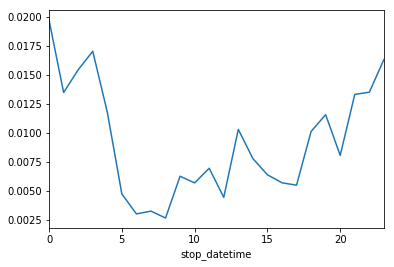

In [58]:
# line plot by default (for a Series)
ri.groupby(ri.stop_datetime.dt.hour).drugs_related_stop.mean().plot()

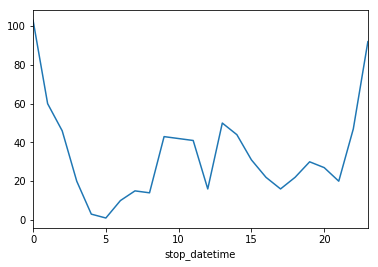

In [59]:
# alternative: count drug-related stops by hour
ri.groupby(ri.stop_datetime.dt.hour).drugs_related_stop.sum().plot()

Lessons:

- Use plots to help you understand trends
- Create exploratory plots using pandas one-liners

## 8. Do most stops occur at night? ([video](https://www.youtube.com/watch?v=GsQ6x3pt2w4&list=PL5-da3qGB5IBITZj_dYSFqnd_15JgqwA6&index=9))

In [60]:
ri.stop_datetime.dt.hour.value_counts().sort_index()
# sort by value

0     5221
1     4442
2     2975
3     1172
4      254
5      210
6     3290
7     4572
8     5210
9     6838
10    7350
11    5877
12    3582
13    4842
14    5634
15    4832
16    3844
17    2900
18    2168
19    2587
20    3340
21    1499
22    3473
23    5629
Name: stop_datetime, dtype: int64

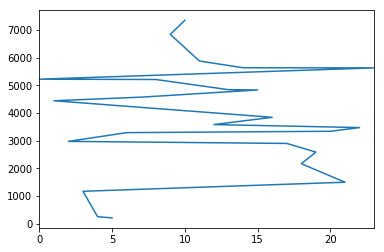

In [61]:
ri.stop_datetime.dt.hour.value_counts().plot()
# why this graph look weird ?
# because it not sorthing the 0 - 20 in x-label is just index
# so you must chage the index of the data

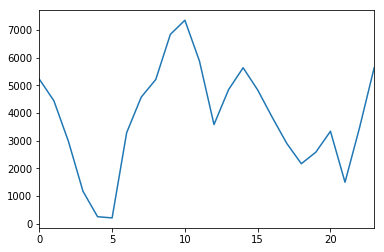

In [62]:
ri.stop_datetime.dt.hour.value_counts().sort_index().plot()

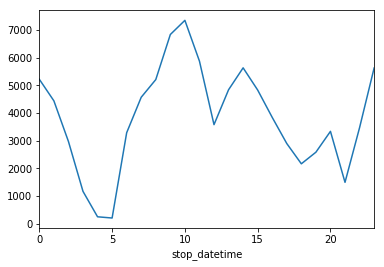

In [63]:
# alternative method
ri.groupby(ri.stop_datetime.dt.hour).stop_date.count().plot()

Lessons:

- Be conscious of sorting when plotting

## 9. Find the bad data in the stop_duration column and fix it ([video](https://www.youtube.com/watch?v=8U8ob9bXakY&list=PL5-da3qGB5IBITZj_dYSFqnd_15JgqwA6&index=10))

In [64]:
# mark bad data as missing
ri.stop_duration.value_counts()
# there are some error formatting in data [1, 2]

0-15 Min     69543
16-30 Min    13635
30+ Min       3228
2                1
1                1
Name: stop_duration, dtype: int64

In [65]:
# what four things are wrong with this code?
# ri[ri.stop_duration == 1 | ri.stop_duration == 2].stop_duration = 'NaN'

In [66]:
# what two things are still wrong with this code?
ri[(ri.stop_duration == '1') | (ri.stop_duration == '2')].stop_duration = 'NaN'
# it is not set the value it just replace with NaN but the system not allow you to
# sooo..

C:\Users\theka\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [67]:
# assignment statement did not work
ri.stop_duration.value_counts()

0-15 Min     69543
16-30 Min    13635
30+ Min       3228
2                1
1                1
Name: stop_duration, dtype: int64

In [68]:
# solves SettingWithCopyWarning
ri.loc[(ri.stop_duration == '1') | (ri.stop_duration == '2'), 'stop_duration'] = 'NaN'

In [69]:
# confusing!
# it a string that writting as "NaN"
ri.stop_duration.value_counts(dropna=False)

# first NaN is real null the other is just StringFake

0-15 Min     69543
16-30 Min    13635
NaN           5333
30+ Min       3228
NaN              2
Name: stop_duration, dtype: int64

In [70]:
# replace 'NaN' string with actual NaN value
import numpy as np
# np.nan mean null 
ri.loc[ri.stop_duration == 'NaN', 'stop_duration'] = np.nan

In [71]:
ri.stop_duration.value_counts(dropna=False)

0-15 Min     69543
16-30 Min    13635
NaN           5335
30+ Min       3228
Name: stop_duration, dtype: int64

In [72]:
# alternative method
ri.stop_duration.replace(['1', '2'], value=np.nan, inplace=True)

Lessons:

- Ambiguous data should be marked as missing
- Don't ignore the SettingWithCopyWarning
- NaN is not a string

## 10. What is the mean stop_duration for each violation_raw?

In [73]:
# why we have to do this? cause we want to find the mean but there is no numerical data to find

In [74]:
# make sure you create this column
mapping = {'0-15 Min':8, '16-30 Min':23, '30+ Min':45}
ri['stop_minutes'] = ri.stop_duration.map(mapping)

In [75]:
# matches value_counts for stop_duration
ri.stop_minutes.value_counts()

8.0     69543
23.0    13635
45.0     3228
Name: stop_minutes, dtype: int64

In [76]:
ri.groupby('violation_raw').stop_minutes.mean()

violation_raw
APB                                 20.987342
Call for Service                    22.034669
Equipment/Inspection Violation      11.460345
Motorist Assist/Courtesy            16.916256
Other Traffic Violation             13.900265
Registration Violation              13.745629
Seatbelt Violation                   9.741531
Special Detail/Directed Patrol      15.061100
Speeding                            10.577690
Suspicious Person                   18.750000
Violation of City/Town Ordinance    13.388626
Warrant                             21.400000
Name: stop_minutes, dtype: float64

In [77]:
ri.groupby('violation_raw').stop_minutes.agg(['mean', 'count'])
# groupby violation raw cause we want to know how much time need per each violate happen

,mean,count
violation_raw,,
APB,20.987342,79
Call for Service,22.034669,1298
Equipment/Inspection Violation,11.460345,11020
Motorist Assist/Courtesy,16.916256,203
Other Traffic Violation,13.900265,16223
Registration Violation,13.745629,3432
Seatbelt Violation,9.741531,2952
Special Detail/Directed Patrol,15.061100,2455
Speeding,10.577690,48462


Lessons:

- Convert strings to numbers for analysis
- Approximate when necessary
- Use count with mean to looking for meaningless means

## 11. Plot the results of the first groupby from the previous exercise

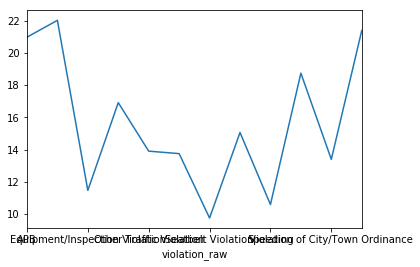

In [78]:
# what's wrong with this?
ri.groupby('violation_raw').stop_minutes.mean().plot()

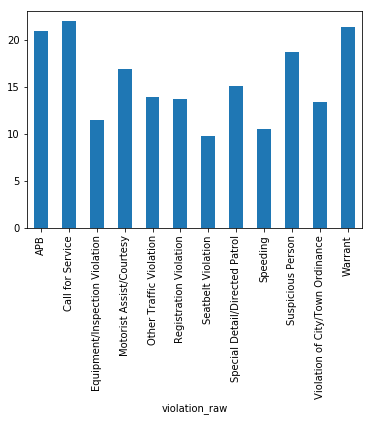

In [79]:
# how could this be made better?
ri.groupby('violation_raw').stop_minutes.mean().plot(kind='bar')

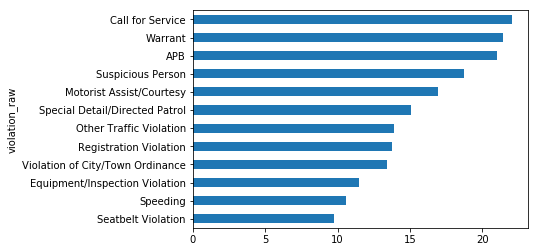

In [80]:
ri.groupby('violation_raw').stop_minutes.mean().sort_values().plot(kind='barh')
# barh is the key

Lessons:

- Don't use a line plot to compare categories
- Be conscious of sorting and orientation when plotting

## 12. Compare the age distributions for each violation

In [81]:
# good first step
ri.groupby('violation').driver_age.describe()

,count,mean,std,min,25%,50%,75%,max
violation,,,,,,,,
Equipment,11007.0,31.781503,11.400900,16.0,23.0,28.0,38.0,89.0
Moving violation,16164.0,36.120020,13.185805,15.0,25.0,33.0,46.0,99.0
Other,4204.0,39.536870,13.034639,16.0,28.0,39.0,49.0,87.0
Registration/plates,3427.0,32.803035,11.033675,16.0,24.0,30.0,40.0,74.0
Seat belt,2952.0,32.206301,11.213122,17.0,24.0,29.0,38.0,77.0
Speeding,48361.0,33.530097,12.821847,15.0,23.0,30.0,42.0,90.0


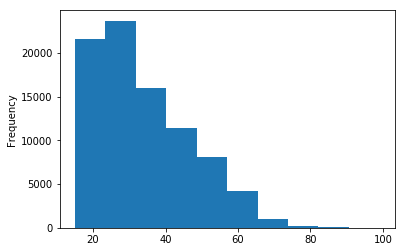

In [82]:
# histograms are excellent for displaying distributions
ri.driver_age.plot(kind='hist')

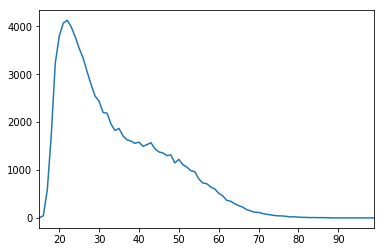

In [83]:
# similar to a histogram
ri.driver_age.value_counts().sort_index().plot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000025E16D0CBA8>,
      dtype=object)

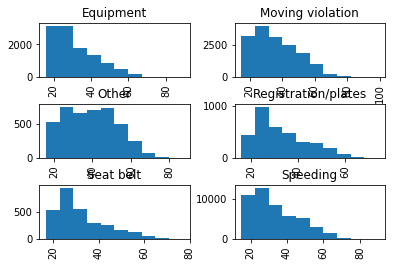

In [84]:
# can't use the plot method
ri.hist('driver_age', by='violation')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000025E16EAE550>,
      dtype=object)

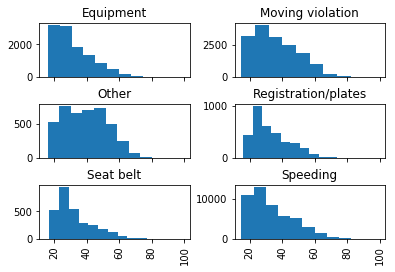

In [85]:
# what changed? how is this better or worse?
ri.hist('driver_age', by='violation', sharex=True)
# xlabel share

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000025E18802B70>,
      dtype=object)

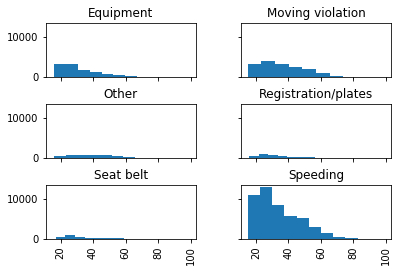

In [86]:
# what changed? how is this better or worse?
ri.hist('driver_age', by='violation', sharex=True, sharey=True)

Lessons:

- Use histograms to show distributions
- Be conscious of axes when using grouped plots

## 13. Pretend you don't have the driver_age column, and create it from driver_age_raw (and call it new_age)

In [87]:
ri.head()
# driver_age_raw it an year driverf born

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,frisk,stop_datetime,stop_minutes
0,2005-01-02,01:55,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,NaN,2005-01-02 01:55:00,8.0
1,2005-01-18,08:15,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,NaN,2005-01-18 08:15:00,8.0
2,2005-01-23,23:15,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,NaN,2005-01-23 23:15:00,8.0
3,2005-02-20,17:15,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,NaN,2005-02-20 17:15:00,23.0
4,2005-03-14,10:00,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,NaN,2005-03-14 10:00:00,8.0


In [88]:
# appears to be year of stop_date minus driver_age_raw
ri.tail()

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,frisk,stop_datetime,stop_minutes
91736,2015-12-31,20:27,M,1986.0,29.0,White,Speeding,Speeding,False,NaN,Warning,False,0-15 Min,False,NaN,2015-12-31 20:27:00,8.0
91737,2015-12-31,20:35,F,1982.0,33.0,White,Equipment/Inspection Violation,Equipment,False,NaN,Warning,False,0-15 Min,False,NaN,2015-12-31 20:35:00,8.0
91738,2015-12-31,20:45,M,1992.0,23.0,White,Other Traffic Violation,Moving violation,False,NaN,Warning,False,0-15 Min,False,NaN,2015-12-31 20:45:00,8.0
91739,2015-12-31,21:42,M,1993.0,22.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,NaN,2015-12-31 21:42:00,8.0
91740,2015-12-31,22:46,M,1959.0,56.0,Hispanic,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,NaN,2015-12-31 22:46:00,8.0


In [89]:
# because you already have datetime data type so you easily access year
ri['new_age'] = ri.stop_datetime.dt.year - ri.driver_age_raw

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000025E18B7FC18>,
      dtype=object)

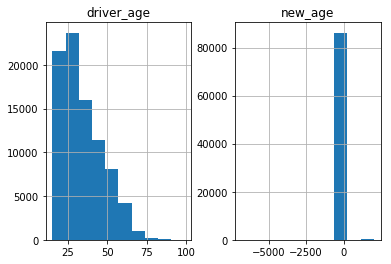

In [90]:
# compare the distributions
ri[['driver_age', 'new_age']].hist()
# its looking weird so I guess that must be some weird data in driver_age_raw

In [91]:
# compare the summary statistics (focus on min and max)
ri[['driver_age', 'new_age']].describe()

,driver_age,new_age
count,86120.000000,86414.000000
mean,34.011333,39.784294
std,12.738564,110.822145
min,15.000000,-6794.000000
25%,23.000000,24.000000
50%,31.000000,31.000000
75%,43.000000,43.000000
max,99.000000,2015.000000


In [92]:
# calculate how many ages are outside that range
ri[(ri.new_age < 15) | (ri.new_age > 99)].shape
# you can change it to below 0

(294, 18)

In [93]:
# raw data given to the researchers
ri.driver_age_raw.isnull().sum()

5327

In [94]:
# age computed by the researchers (has more missing values)
ri.driver_age.isnull().sum()

5621

In [95]:
# what does this tell us? researchers set driver_age as missing if less than 15 or more than 99
5621-5327

294

In [96]:
# driver_age_raw NOT MISSING, driver_age MISSING
ri[(ri.driver_age_raw.notnull()) & (ri.driver_age.isnull())].head()

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,frisk,stop_datetime,stop_minutes,new_age
146,2005-10-05,08:50,M,0.0,NaN,White,Other Traffic Violation,Moving violation,False,NaN,Citation,False,0-15 Min,False,NaN,2005-10-05 08:50:00,8.0,2005.0
281,2005-10-10,12:05,F,0.0,NaN,White,Other Traffic Violation,Moving violation,False,NaN,Warning,False,0-15 Min,False,NaN,2005-10-10 12:05:00,8.0,2005.0
331,2005-10-12,07:50,M,0.0,NaN,White,Motorist Assist/Courtesy,Other,False,NaN,No Action,False,0-15 Min,False,NaN,2005-10-12 07:50:00,8.0,2005.0
414,2005-10-17,08:32,M,2005.0,NaN,White,Other Traffic Violation,Moving violation,False,NaN,Citation,False,0-15 Min,False,NaN,2005-10-17 08:32:00,8.0,0.0
455,2005-10-18,18:30,F,0.0,NaN,White,Speeding,Speeding,False,NaN,Warning,False,0-15 Min,False,NaN,2005-10-18 18:30:00,8.0,2005.0


In [97]:
# set the ages outside that range as missing
# set it to null in new_age
ri.loc[(ri.new_age < 15) | (ri.new_age > 99), 'new_age'] = np.nan

In [98]:
ri.new_age.equals(ri.driver_age)

True

Lessons:

- Don't assume that the head and tail are representative of the data
- Columns with missing values may still have bad data (driver_age_raw)
- Data cleaning sometimes involves guessing (driver_age)
- Use histograms for a sanity check